

horizontal line is in: 40000




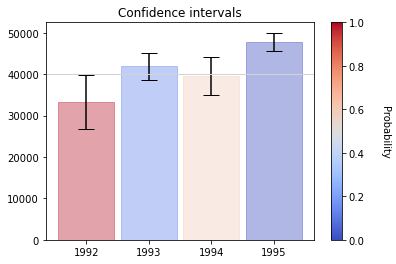

In [10]:
# ----------------------- First part -----------------------
# First, I import all the libraries and data necessary

import pandas as pd
import numpy as np
import math

from scipy.stats import norm
import math
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import ipywidgets as wdg
from matplotlib.cm import ScalarMappable
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure


np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

# ----------------------- Second part -----------------------

# First I create the list to store the parameters I need for every year, such as: mean, standard error, etc...
years = list(df.index)
means = []
# SE = sigma / sqrt(n)
SEs = []

# Then I define the parameters that remain the same across different years
n = 3650
z_score = 1.96

# I loop through the dataframe index to calculate the sample statistics I need
for ind, row in df.iterrows():
    means.append(row.mean())
    # SE = sigma / sqrt(n)
    SEs.append(row.std() / math.sqrt(n))
    

# Margins of error for later plotting
MEs = [x * z_score for x in SEs]

# ----------------------- Third part -----------------------
# I define the function to calculate the probability for a given value to be above the sample statistic (interval)
def calc_prob(point, mean, std):
    result = norm.cdf(point, loc = mean, scale = std)
    return result

# I define the point (line) I want to check the probability for
horizontal_line = 40000

# Define the probabilities list, where I'll store all the probs for each year to be below the given value -> the
# variable I just defined
probabilities = []

# I loop through all the years to calculate the probs
for i in range(len(means)):
    prob = calc_prob(horizontal_line, means[i], SEs[i])
    probabilities.append(prob)
    
# ----------------------- Fourth part -----------------------
# I start the plot
fig = plt.figure()

# and associate it with the backend
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)

# I define the positions for the bars
pos = np.arange(len(years))
bars = plt.bar(pos, means, width = 0.9, align = 'center', alpha = 0.4,
               color = ['#56646B', 'blue', 'red', 'green'], edgecolor = 'grey', yerr = MEs, capsize = 8)

# Now the ticks for the plot
plt.xticks(pos, years)

# Title
plt.title('Confidence intervals')

# I draw the horizontal line coming from the value we want the means to be compared with
plt.axhline(y = horizontal_line, linewidth = 1, color = 'lightgrey')

# I set up the scalar plot -> coolwarm
my_cmap = plt.cm.get_cmap('coolwarm')
sm = ScalarMappable(cmap = my_cmap, norm = plt.Normalize(0,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Probability', rotation = 270,labelpad = 25)

# I loop through all the bars, plotting them according to the probability they have to be below the given value
for index, bar in enumerate(bars):
    bar.set_color(c = my_cmap(probabilities[index]))
    
    
print('\n')
print('horizontal line is in:', horizontal_line)
print('\n')

canvas.print_png('CustomVisualization.png')